

# Project: Investigate a TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


My project is a report for a TMDb movie dataset investigation. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. We need to find out if there is a connection between release dates, average votes,and genres. That report could be considered as a part of machine learing algorithm development to understand user's needs.<br>

### Goal:
__We should answer these questions:__

- Is there a correlation between the quantity of produced featured filmes across every decade?







- What is the most common genre for different types of movies, and what is their most common average vote? What is the most common range of average votes for different genres?




### Stages
Data is stored in the file `'tmdb-movies.csv'`. There is a high chance that the data quality of some columns will be bad since that dataset was merged multiple times with other datasets, and new "synthetic" columns were added. So we need to explore it before testing the hypotheses.

First, evaluate the quality of the data and see whether its issues are significant. Then, during data preprocessing, try to account for the most critical problems.

__The project consists of four stages:__
- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusions

__The data wrangling stage consists of 4 substages:__
- General Properties
- Data transformation
- Treating missing values and unrealistic values
- Checking for duplicates
- Categorization of data



In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
%matplotlib inline

#!pip install --upgrade pandas==0.25.0
#!pip install --upgrade seaborn

<a id='wrangling'></a>
## Data Wrangling



### General Properties

__Description of the data:__
- `id`                      - row id
- `imdb_id`                 - imdb_id       
- `popularity`              - movie's popularity 
- `budget`                  - movie's budget 
- `revenue`                 - movie's revenue
- `original_title`          - movie's title
- `cast`                    - movie's cast
- `homepage`                - movie's homepage
- `director`                - movie's director(s)
- `tagline`                 - movie's tagline
- `keywords`                - movie's keywords
- `overview`                - movie's overview
- `runtime`                 - movie's runtime
- `genres`                  - movie's genres
- `production_companies`    - movie's production companies
- `release_date`            - movie's release date
- `vote_count`              - votes total per movie
- `vote_average`            - movie's avarage vote 
- `release_year`            - movie's release year
- `budget_adj`              - movie's adjusted budget 
- `revenue_adj`             - movie's adjusted revenue

Loading data and printing the first 20 lines to understand the potential problems with our dataset:

In [2]:
# Load your data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

Checking the general properties of the dataset:














Perform operations to inspect data types and look for instances of missing or possibly errant data.




In [3]:
# Perform operations to inspect data types and look for instances of missing or possibly errant data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



### Data Cleaning 

As we see in the previous section, the dataset contains multiple missing values, incorrect data types, and artifacts from the encoding-decoding process. <br>


Our next steps should be:
1. Checking the distribution of the missing values to determine if there are any patterns here or if they are considered MCAR
2. Transforming incorrect data types to correct one
3. Fixing encoding-decoding artifacts
5. Checking for inadequate values and replacing them with NA to treat them as missing values
6. Checking for duplicates
7. Categorizing data and explode columns with lists
8. Trim dataset

#### Checking the distribution of the missing values.

Checking the distribution of the missing values to determine if there are any patterns here or if they are considered MCAR


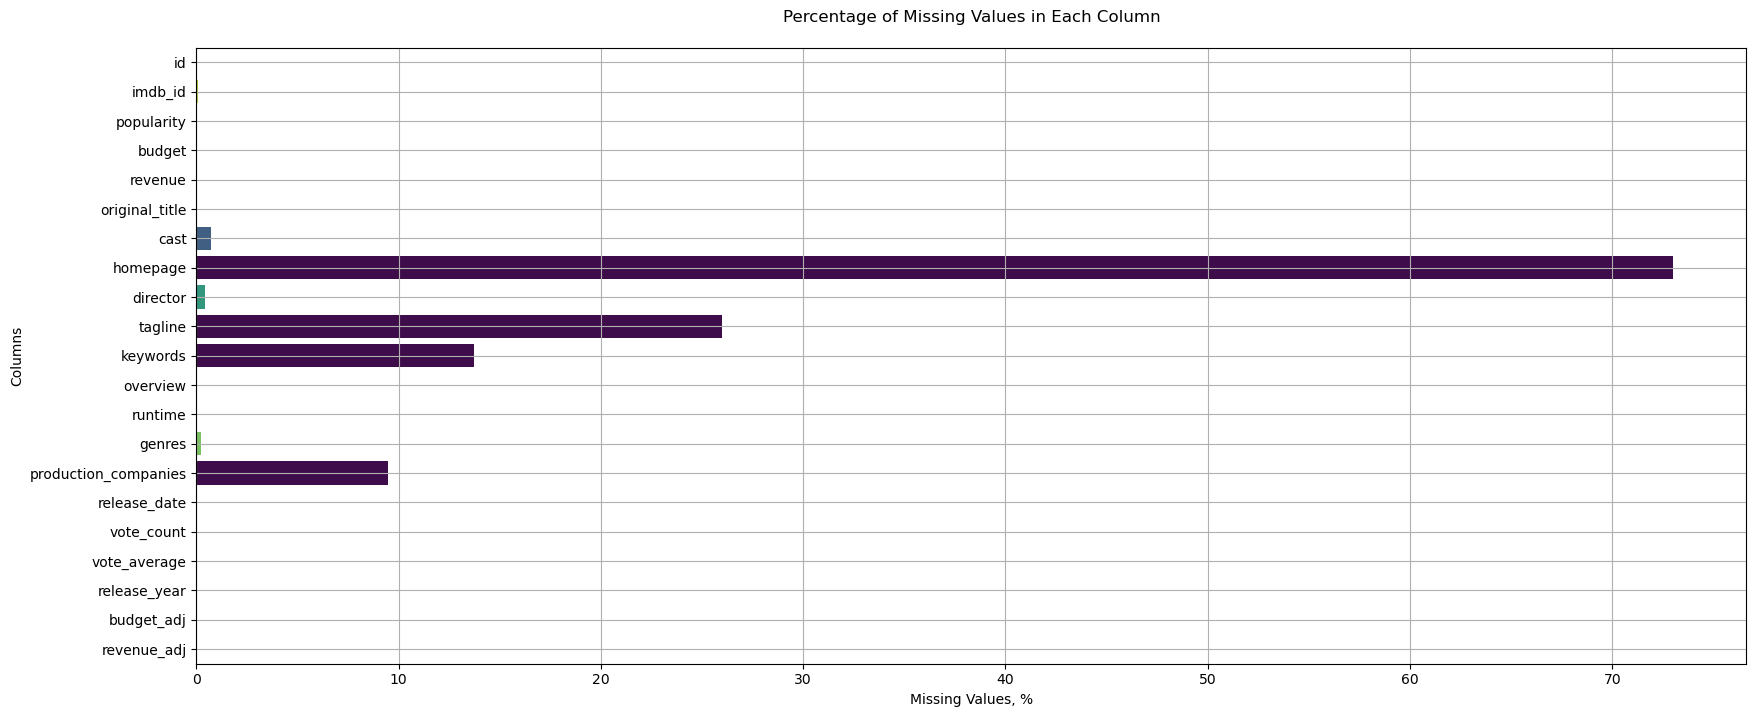

In [4]:
#Checking the distribution of the missing values to determine if there are any patterns here or if they are considered MCAR

rows_num = df.shape[0]
na_values = (df.isna().sum() / rows_num) * 100

plt.figure(figsize=(20, 8))
sns.barplot(x=na_values.values, 
            y=na_values.index,
           palette=sns.color_palette("viridis_r", n_colors=len(na_values), as_cmap=True)(na_values.values))

plt.title("Percentage of Missing Values in Each Column\n")
plt.xlabel("Missing Values, %")
plt.ylabel("Columns")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

The barplot above represents the distribution of the missing values across the dataset. The darker the color - the biggest percentage of the missing values presented in that column. Based on my experience, we can drop those rows if the missing value percentage is less than 10% (ideally less than 5%). However, dropping those columns is better if it's over 10%.

`Kaggle` noted that `'homepage'`,`'id'`, `'original_title'`, `'overview'`, `'popularity'`, `'production_companies'`, `'release_date'`, `'tagline'`, `'vote_average'`, and `'keywords'` are new columns in that dataset. Since columns with the highest percentage of missing values are new, we can't describe them as MCAR. That type of missing value is called `Structurally missing`, which might indicate an improper data-gathering process. 


Also, `'imdb_id'`, `'cast'`, `'director'`, `'overview'`, and `'genres'` contain missing values. They weren't new columns, there are no patterns, and their impact is so little, so we can determine these values as MCAR and ignore them. Also, it is important to note that we can't replace those values with average, mode, or median since they are not "classification" columns and contain non-numerical values.

Before checking other data, we need to drop the `'homepage'`, `'tagline'`, and `'keywords'` columns since their missing values percentage is extremely high. Also, we need to drop a `'release_year'`column since we can access the release year from the `'release_date'` column.


In [5]:
#drop `homepage`, `tagline`, and `keywords` columns
df.drop(['homepage', 'tagline', 'keywords','release_year'], axis=1, inplace=True)

Drop rows with missing values:


In [6]:
#drop rows with missing values:
df.dropna(inplace=True)

Check the general properties of the dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9771 non-null   int64  
 1   imdb_id               9771 non-null   object 
 2   popularity            9771 non-null   float64
 3   budget                9771 non-null   int64  
 4   revenue               9771 non-null   int64  
 5   original_title        9771 non-null   object 
 6   cast                  9771 non-null   object 
 7   director              9771 non-null   object 
 8   overview              9771 non-null   object 
 9   runtime               9771 non-null   int64  
 10  genres                9771 non-null   object 
 11  production_companies  9771 non-null   object 
 12  release_date          9771 non-null   object 
 13  vote_count            9771 non-null   int64  
 14  vote_average          9771 non-null   float64
 15  budget_adj          

#### Data transformation

Transforming incorrect data types to correct ones.

1. `'release_date'` - convert to a date format
2. `'budget_adj'`,`'revenue_adj'`, `'runtime'`- convert the scientific notation representation and float to an integer




__1. `'release_date'` - convert to a date format__

The original dataset values were presented as _"month/day/last two digits of the year"_. To fix that problem, we should create a function that will check the new value and determine if it is before 2015 or after 2015. All dates after 2015 should be converted to the format _"19XX"_.

 > <div class="alert alert-block alert-info">
<b>Note:</b> According to the specs, the earliest date is 1916, and the latest is 2015. Otherwise, that function will not be appropriate in that situation.
</div>


Creating a function:

In [8]:
def adjust_year(date):
    year = int(date[-2:])
    if year <= 15:
        return (date[:-2] + str(2000 + year))
    else:
        return (date[:-2] + str(1900 + year))

Apply `adjust_year` function to the `"release_date"` column and convert string values to the date format:

In [9]:
#converting date to a date values
df['release_date'] = pd.to_datetime(df['release_date'].apply(adjust_year), format='%m/%d/%Y')


Print top 15 values to check if conversion was successfull:

In [10]:
df["release_date"].head(15)


0    2015-06-09
1    2015-05-13
2    2015-03-18
3    2015-12-15
4    2015-04-01
5    2015-12-25
6    2015-06-23
7    2015-09-30
8    2015-06-17
9    2015-06-09
10   2015-10-26
11   2015-02-04
12   2015-01-21
13   2015-07-16
14   2015-04-22
Name: release_date, dtype: datetime64[ns]

Print bottom 15 rows to check if conversion was succsessfull 

In [11]:
df["release_date"].tail(15)

10850   1966-02-23
10851   1966-06-22
10852   1966-05-31
10854   1966-02-17
10855   1966-01-20
10856   1966-02-16
10857   1966-06-10
10858   1966-05-25
10859   1966-10-05
10860   1966-05-20
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, dtype: datetime64[ns]

The conversion was successful.

__2. `'budget_adj'`,`'revenue_adj'`- convert the scientific notation representation to an integer__



In [12]:
#convert the scientific notation representation to an intege for budget_adj and revenue_adj

df[["budget_adj", "revenue_adj",'runtime']] = df[["budget_adj", "revenue_adj",'runtime']].astype(int)



Checking the first few rows to determine is the conversion was successfull

In [13]:
df[["budget_adj", "revenue_adj",'runtime']].head()

,budget_adj,revenue_adj,runtime
0,137999939,1392445892,124
1,137999939,348161292,120
2,101199955,271619025,119
3,183999919,1902723129,136
4,174799923,1385748801,137


Conversion was successfull. 

Print the Dataset general information:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9771 non-null   int64         
 1   imdb_id               9771 non-null   object        
 2   popularity            9771 non-null   float64       
 3   budget                9771 non-null   int64         
 4   revenue               9771 non-null   int64         
 5   original_title        9771 non-null   object        
 6   cast                  9771 non-null   object        
 7   director              9771 non-null   object        
 8   overview              9771 non-null   object        
 9   runtime               9771 non-null   int32         
 10  genres                9771 non-null   object        
 11  production_companies  9771 non-null   object        
 12  release_date          9771 non-null   datetime64[ns]
 13  vote_count       

#### Fixing encoding-decoding artifacts

Strings that contain characters like `GonzÃ¡lez IÃ±Ã¡rritu` or `LÃ©a` are evidence of encoding-decoding artifacts. To convert such artifacts, we need to use the unicodedata library.


First, we need to identify which columns contain those artifacts. To do that, we need to use the isascii() built-in function across all columns with string values.


> <div class="alert alert-block alert-info">
<b>Note:</b> Please, note that isascii() function works only with Python v3.7 and above.
</div>

Creating the function:

In [15]:
def artifacts_detector(df):
    columns_w_artifacts = []
    for column in df.columns:
        for value in df[column]:
            # check if the column contains strings and contains an artifacts. isascii() returns true if there is no artifacts
            if isinstance(value, str) and not value.isascii():
                columns_w_artifacts.append(column)
                #using break insted of using a while loop and a counter will be more time-efficient
                break
    return columns_w_artifacts


Apply that function, store the output in the `selected_columns` variable, and print it:

In [16]:
selected_columns = artifacts_detector(df)
print(selected_columns)

['original_title', 'cast', 'director', 'overview', 'production_companies']


Create a function that .normalize the string using a unicodedata module, then encodes all ASCII to UTF-8, and, since now that string contains only non-ASCII characters, decodes it back from UTF-8 to ASCII:
> <div class="alert alert-block alert-info">
<b>Note:</b> All strings should be lower-case. We can change it later when we explode those columns.
</div>

In [17]:
def encode_decode_fix(value):
    return unicodedata.normalize('NFD', value).encode('ascii', 'ignore').decode('utf-8').lower()

Apply that function to all columns that contain artifacts:

In [18]:
df[selected_columns] = df[selected_columns].applymap(encode_decode_fix)

Run the `artifacts_detector`function to check if the issue was resolved:

In [19]:
selected_columns = artifacts_detector(df)
print(selected_columns)

[]


In [20]:
df.head(15)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action|Adventure|Science Fiction|Thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,137999939,1392445892
1,76341,tt1392190,28.419936,150000000,378436354,mad max: fury road,tom hardy|charlize theron|hugh keays-byrne|nic...,george miller,an apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,137999939,348161292
2,262500,tt2908446,13.112507,110000000,295238201,insurgent,shailene woodley|theo james|kate winslet|ansel...,robert schwentke,beatrice prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,summit entertainment|mandeville films|red wago...,2015-03-18,2480,6.3,101199955,271619025
3,140607,tt2488496,11.173104,200000000,2068178225,star wars: the force awakens,harrison ford|mark hamill|carrie fisher|adam d...,j.j. abrams,thirty years after defeating the galactic empi...,136,Action|Adventure|Science Fiction|Fantasy,lucasfilm|truenorth productions|bad robot,2015-12-15,5292,7.5,183999919,1902723129
4,168259,tt2820852,9.335014,190000000,1506249360,furious 7,vin diesel|paul walker|jason statham|michelle ...,james wan,deckard shaw seeks revenge against dominic tor...,137,Action|Crime|Thriller,universal pictures|original film|media rights ...,2015-04-01,2947,7.3,174799923,1385748801
5,281957,tt1663202,9.110700,135000000,532950503,the revenant,leonardo dicaprio|tom hardy|will poulter|domhn...,alejandro gonzalez iaarritu,"in the 1820s, a frontiersman, hugh glass, sets...",156,Western|Drama|Adventure|Thriller,regency enterprises|appian way|catchplay|anony...,2015-12-25,3929,7.2,124199945,490314247
6,87101,tt1340138,8.654359,155000000,440603537,terminator genisys,arnold schwarzenegger|jason clarke|emilia clar...,alan taylor,"the year is 2029. john connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,paramount pictures|skydance productions,2015-06-23,2598,5.8,142599937,405355075
7,286217,tt3659388,7.667400,108000000,595380321,the martian,matt damon|jessica chastain|kristen wiig|jeff ...,ridley scott,"during a manned mission to mars, astronaut mar...",141,Drama|Adventure|Science Fiction,twentieth century fox film corporation|scott f...,2015-09-30,4572,7.6,99359956,547749654
8,211672,tt2293640,7.404165,74000000,1156730962,minions,sandra bullock|jon hamm|michael keaton|allison...,kyle balda|pierre coffin,"minions stuart, kevin and bob are recruited by...",91,Family|Animation|Adventure|Comedy,universal pictures|illumination entertainment,2015-06-17,2893,6.5,68079970,1064192016
9,150540,tt2096673,6.326804,175000000,853708609,inside out,amy poehler|phyllis smith|richard kind|bill ha...,pete docter,"growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,walt disney pictures|pixar animation studios|w...,2015-06-09,3935,8.0,160999929,785411574


Wonderful! issue was resolved, and we can proceed with the data-wrangling stage.

#### Checking for inadequate values and missing values


The easiest way to do that is to use describe() function 

In [21]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,9771.000000,9771.000000,9.771000e+03,9.771000e+03,9771.000000,9771.000000,9771.000000,9.771000e+03,9.771000e+03
mean,63188.435165,0.694765,1.618439e+07,4.423583e+07,102.938491,239.339986,5.963289,1.942105e+07,5.512673e+07
std,90720.809530,1.036975,3.221186e+07,1.225943e+08,27.864293,603.036904,0.913213,3.566724e+07,1.493504e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,-2.147484e+09
25%,10221.000000,0.232665,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,0.000000e+00,0.000000e+00
50%,18681.000000,0.419765,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,3.245000e+05,0.000000e+00
75%,70506.500000,0.776436,1.945000e+07,3.105254e+07,112.000000,173.000000,6.600000,2.469335e+07,4.294275e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,4.250000e+08,1.907006e+09


As we can wee above, there is multiple columns with 0 as a minimum value which indicate the missing value.



In [22]:
df[['budget', 'revenue', 'runtime','budget_adj','revenue_adj']] = df[['budget', 'revenue', 'runtime','budget_adj','revenue_adj']].replace(0, np.nan)

In [23]:
#print the general info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9771 non-null   int64         
 1   imdb_id               9771 non-null   object        
 2   popularity            9771 non-null   float64       
 3   budget                5022 non-null   float64       
 4   revenue               4751 non-null   float64       
 5   original_title        9771 non-null   object        
 6   cast                  9771 non-null   object        
 7   director              9771 non-null   object        
 8   overview              9771 non-null   object        
 9   runtime               9758 non-null   float64       
 10  genres                9771 non-null   object        
 11  production_companies  9771 non-null   object        
 12  release_date          9771 non-null   datetime64[ns]
 13  vote_count       

Check distribution

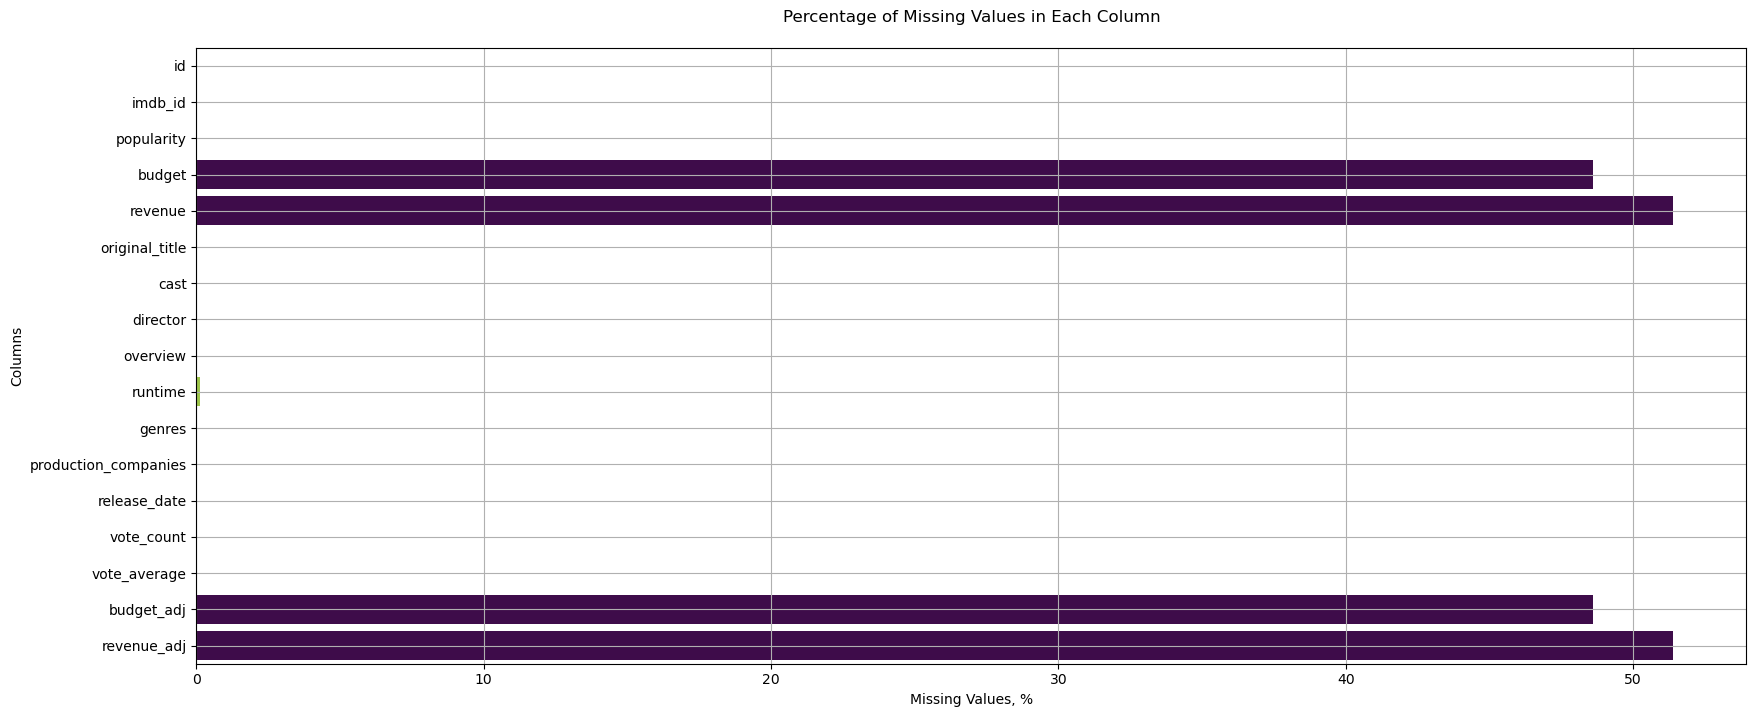

In [24]:
rows_num = df.shape[0]
na_values = (df.isna().sum() / rows_num) * 100

plt.figure(figsize=(20, 8))
sns.barplot(x=na_values.values, 
            y=na_values.index,
           palette=sns.color_palette("viridis_r", n_colors=len(na_values), as_cmap=True)(na_values.values))

plt.title("Percentage of Missing Values in Each Column\n")
plt.xlabel("Missing Values, %")
plt.ylabel("Columns")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Columns `budget`, `revenue`, `budget_adj`, and `revenue_adj` have over 40% of the missing values, and we can't use those columns to make any sort of analysis; we should drop those columns. I assume that that amount of missing values can be connected to the data transfer problems, and therefore they are MNAR values.

Also, I see a very small percentage of the missing values at the `runtime`, and we should investigate that column later to replace the missing values.

First, we should drip columns `budget`, `revenue`, `budget_adj`, and `revenue_adj`:


In [25]:
df.drop(['budget', 'revenue', 'budget_adj', 'revenue_adj'] , axis=1, inplace=True)

Print values distribution for the `runtime` column to select the appropriate option to fill the missing values

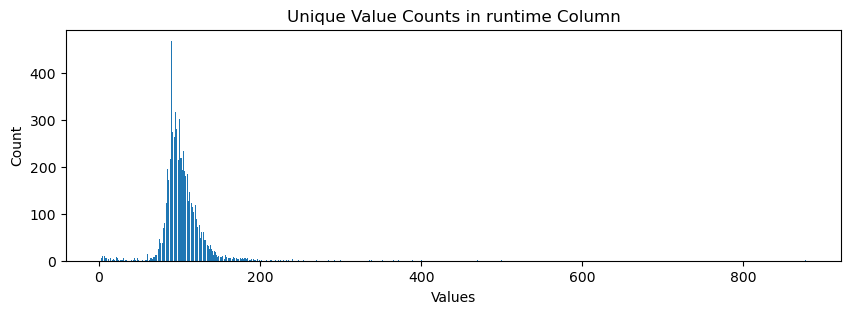

In [26]:
value_counts = df['runtime'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 3))
plt.bar(value_counts.index, value_counts.values)

# Set the labels and title
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Unique Value Counts in runtime Column')

# Rotate the x-axis labels if needed
plt.xticks(rotation=0)

# Show the plot
plt.show()


The distribution graph is left-skewed with highly-visible peak. In that situation, the most appropriate value to replace the missing values should be mode value.

Replacing missing values in the runtime column with mode value and turning them back to an integer:

In [27]:
df['runtime'] = df['runtime'].fillna(df['runtime'].mode()[0])
df['runtime'] = df['runtime'].astype(int)

Printing the general information:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9771 non-null   int64         
 1   imdb_id               9771 non-null   object        
 2   popularity            9771 non-null   float64       
 3   original_title        9771 non-null   object        
 4   cast                  9771 non-null   object        
 5   director              9771 non-null   object        
 6   overview              9771 non-null   object        
 7   runtime               9771 non-null   int32         
 8   genres                9771 non-null   object        
 9   production_companies  9771 non-null   object        
 10  release_date          9771 non-null   datetime64[ns]
 11  vote_count            9771 non-null   int64         
 12  vote_average          9771 non-null   float64       
dtypes: datetime64[ns]

### Checking for duplicates


Checking for duplicates before we use explode() function:

In [29]:
df.duplicated().sum()

1

Drop duplicates:

In [30]:
df.drop_duplicates(inplace = True)

Double-check if we removed all duplicates:

In [31]:
df.duplicated().sum()

0

### Categorizing data and explode columns with lists


#### Explode genres,cast,and director columns.


First, create a list named `columns_expl`:


In [32]:
columns_expl=['genres','cast','director','production_companies']

Second, since the input for an `explode()` method is a list, we have to split strings using `"|"` as a delimiter:

In [33]:
df[columns_expl] = df[columns_expl].applymap(lambda x: x.split('|'))


Iterate through the `columns_expl` list to explode all columns in that list:

In [34]:
for col in columns_expl:
    df=df.explode(col)

Print a few rows to check if everything is ok:

In [35]:
df.head(15)

,id,imdb_id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,universal studios,2015-06-09,5562,6.5
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,amblin entertainment,2015-06-09,5562,6.5
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,legendary pictures,2015-06-09,5562,6.5
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,fuji television network,2015-06-09,5562,6.5
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,dentsu,2015-06-09,5562,6.5
0,135397,tt0369610,32.985763,jurassic world,bryce dallas howard,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,universal studios,2015-06-09,5562,6.5
0,135397,tt0369610,32.985763,jurassic world,bryce dallas howard,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,amblin entertainment,2015-06-09,5562,6.5
0,135397,tt0369610,32.985763,jurassic world,bryce dallas howard,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,legendary pictures,2015-06-09,5562,6.5
0,135397,tt0369610,32.985763,jurassic world,bryce dallas howard,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,fuji television network,2015-06-09,5562,6.5
0,135397,tt0369610,32.985763,jurassic world,bryce dallas howard,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,dentsu,2015-06-09,5562,6.5


Checking for duplicates

In [36]:
df.duplicated().sum()

138

These duplicates mean that some of the strings contained repeated cast members.

Drop duplicates:

In [37]:
df.drop_duplicates(inplace = True)

Double-check if we removed all duplicates:

In [38]:
df.duplicated().sum()

0

Printing the general information:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316580 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    316580 non-null  int64         
 1   imdb_id               316580 non-null  object        
 2   popularity            316580 non-null  float64       
 3   original_title        316580 non-null  object        
 4   cast                  316580 non-null  object        
 5   director              316580 non-null  object        
 6   overview              316580 non-null  object        
 7   runtime               316580 non-null  int32         
 8   genres                316580 non-null  object        
 9   production_companies  316580 non-null  object        
 10  release_date          316580 non-null  datetime64[ns]
 11  vote_count            316580 non-null  int64         
 12  vote_average          316580 non-null  float64       
dtype

#### Categorizing data

Printing unique values of the `'genres'` column to check for any indication of Non-obvious duplicates or sub-categories of major genres:

In [40]:
print(df['genres'].unique())

['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' 'Foreign']


As we can see above, there is no indication of non-obvious duplicates and sub-categories.

Next, we have to introduce a new category: `company_priority`. The original string contained all production companies in the priority order. Using `groupby()` and `transform()`, we can assign `primary` to the first production company in the film and `secondary` to the other:

> <div class="alert alert-block alert-info">
<b>Note:</b> cumcount() will assign temp indexes within each group
</div>

> <div class="alert alert-block alert-info">
<b>Note:</b> The "key" part of the groupby() should include the main key `original_title` and all other columns, except for the column we should investigate, with relationships one to many.
</div>

In [41]:
df['company_priority'] = df.groupby(['original_title', 'genres','cast','director'])['production_companies'].cumcount().apply(lambda x: 'primary' if x == 0 else 'secondary')

Printing a few rows from the columns `'original_title'`, `'cast'`, `'director'`, `'runtime'`, `'genres'`, `'production_companies'`, `'vote_average'`, `'company_priority'` to check if the asignment was performed correctly:

In [42]:
df[['original_title','cast','director','runtime','genres','production_companies','vote_average','company_priority']].head(15)

,original_title,cast,director,runtime,genres,production_companies,vote_average,company_priority
0,jurassic world,chris pratt,colin trevorrow,124,Action,universal studios,6.5,primary
0,jurassic world,chris pratt,colin trevorrow,124,Action,amblin entertainment,6.5,secondary
0,jurassic world,chris pratt,colin trevorrow,124,Action,legendary pictures,6.5,secondary
0,jurassic world,chris pratt,colin trevorrow,124,Action,fuji television network,6.5,secondary
0,jurassic world,chris pratt,colin trevorrow,124,Action,dentsu,6.5,secondary
0,jurassic world,bryce dallas howard,colin trevorrow,124,Action,universal studios,6.5,primary
0,jurassic world,bryce dallas howard,colin trevorrow,124,Action,amblin entertainment,6.5,secondary
0,jurassic world,bryce dallas howard,colin trevorrow,124,Action,legendary pictures,6.5,secondary
0,jurassic world,bryce dallas howard,colin trevorrow,124,Action,fuji television network,6.5,secondary
0,jurassic world,bryce dallas howard,colin trevorrow,124,Action,dentsu,6.5,secondary


Output confirmed that the assignment was performed correctly.

Next, we should categorize our movies by runtime into three categories: short, featured, and series, and put those values into `movie_type`.

First, create a function that will assign a category based on the runtime:

In [43]:
def movie_cat(runtime):
    if runtime < 80:
        return "short"
    elif runtime >= 80 and runtime <= 240:
        return "featured"
    else:
        return "series"

Apply a new function to our dataset:

In [44]:
df['movie_type'] = df['runtime'].apply(movie_cat)

In [45]:
df[['runtime','movie_type']].head()

,runtime,movie_type
0,124,featured
0,124,featured
0,124,featured
0,124,featured
0,124,featured


Next, we should categorize our movies by decades and put those values into `decade`.

First, create a function that will return a decade based on the release date:

In [46]:
def decades(date):
    if date.year >= 1910 and date.year < 1920 :
        return "1910s"
    elif date.year >= 1920 and date.year < 1930 :
        return "1920s"
    elif date.year >= 1930 and date.year < 1940 :
        return "1930s"
    elif date.year >= 1940 and date.year < 1950 :
        return "1940s"
    elif date.year >= 1950 and date.year < 1960 :
        return "1950s"
    elif date.year >= 1960 and date.year < 1970 :
        return "1960s"
    elif date.year >= 1970 and date.year < 1980 :
        return "1970s"
    elif date.year >= 1980 and date.year < 1990 :
        return "1980s"
    elif date.year >= 1990 and date.year < 2000 :
        return "1990s"
    elif date.year >= 2000 and date.year < 2010 :
        return "2000s"
    elif date.year >= 2010 and date.year < 2020 :
        return "2010s"
    
    
    

Second, create a new column `decade` and apply a new function:

In [47]:
df['decade']=df['release_date'].apply(decades)

Print a few lines from top and from bottom to check if our function worked correctly:

In [48]:
df.head()

,id,imdb_id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,company_priority,movie_type,decade
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,universal studios,2015-06-09,5562,6.5,primary,featured,2010s
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,amblin entertainment,2015-06-09,5562,6.5,secondary,featured,2010s
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,legendary pictures,2015-06-09,5562,6.5,secondary,featured,2010s
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,fuji television network,2015-06-09,5562,6.5,secondary,featured,2010s
0,135397,tt0369610,32.985763,jurassic world,chris pratt,colin trevorrow,twenty-two years after the events of jurassic ...,124,Action,dentsu,2015-06-09,5562,6.5,secondary,featured,2010s


In [49]:
df.tail()

,id,imdb_id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,company_priority,movie_type,decade
10865,22293,tt0060666,0.035919,manos: the hands of fate,harold p. warren,harold p. warren,a family gets lost on the road and stumbles up...,74,Horror,norm-iris,1966-11-15,15,1.5,primary,short,1960s
10865,22293,tt0060666,0.035919,manos: the hands of fate,tom neyman,harold p. warren,a family gets lost on the road and stumbles up...,74,Horror,norm-iris,1966-11-15,15,1.5,primary,short,1960s
10865,22293,tt0060666,0.035919,manos: the hands of fate,john reynolds,harold p. warren,a family gets lost on the road and stumbles up...,74,Horror,norm-iris,1966-11-15,15,1.5,primary,short,1960s
10865,22293,tt0060666,0.035919,manos: the hands of fate,diane mahree,harold p. warren,a family gets lost on the road and stumbles up...,74,Horror,norm-iris,1966-11-15,15,1.5,primary,short,1960s
10865,22293,tt0060666,0.035919,manos: the hands of fate,stephanie nielson,harold p. warren,a family gets lost on the road and stumbles up...,74,Horror,norm-iris,1966-11-15,15,1.5,primary,short,1960s


#### Trim dataset

Trim dataset and exclude columns that won't be needed for our EDA.

drop `id`, `imdb_id`, `popularity`, `cast`, `overview`, `vote_count` columns and save trimmed dataset with a name `'tdf'`:

> <div class="alert alert-block alert-info">
<b>Note:</b> I decided to save the trimmed dataset with a new name because it can be helpful for other questions in the future.
</div>

In [50]:
tdf = df.drop(['id', 'imdb_id', 'popularity', 'cast', 'overview'] , axis=1)

In [51]:
#Print the general info
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316580 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   original_title        316580 non-null  object        
 1   director              316580 non-null  object        
 2   runtime               316580 non-null  int32         
 3   genres                316580 non-null  object        
 4   production_companies  316580 non-null  object        
 5   release_date          316580 non-null  datetime64[ns]
 6   vote_count            316580 non-null  int64         
 7   vote_average          316580 non-null  float64       
 8   company_priority      316580 non-null  object        
 9   movie_type            316580 non-null  object        
 10  decade                316580 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7)
memory usage: 27.8+ MB


The new dataset would have a lot of duplicates since cast column was dropped. 

Print the sum of the duplicates:

In [52]:
tdf.duplicated().sum()

252617

Drop duplicates:


In [53]:
tdf.drop_duplicates(inplace = True)

Double-check if we removed all duplicates:

In [54]:
tdf.duplicated().sum()

0

Printing the general information:

In [55]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63963 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   original_title        63963 non-null  object        
 1   director              63963 non-null  object        
 2   runtime               63963 non-null  int32         
 3   genres                63963 non-null  object        
 4   production_companies  63963 non-null  object        
 5   release_date          63963 non-null  datetime64[ns]
 6   vote_count            63963 non-null  int64         
 7   vote_average          63963 non-null  float64       
 8   company_priority      63963 non-null  object        
 9   movie_type            63963 non-null  object        
 10  decade                63963 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7)
memory usage: 5.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Is there a correlation between the monthly quantity of produced films every decade?


Is there a correlation between the monthly quantity of produced films every decade? And whether or not it is connected with major holidays.



To answer this question, we need to:
- create a reference dataset `df_ref1`, where we need to:

- exclude all rows except those that have `'featured'` movie type,

- drop `director`, `runtime`, `company_priority`, `movie_type`, `production_companies`, `vote_count`,`vote_average` columns, 

- print graphs for each decade

 


Exclude all rows except those that have `'featured'` movie type:

In [56]:
df_ref1 =tdf[tdf['movie_type'] == 'featured'] 


Drop `director`, `runtime`, `company_priority`, `movie_type`, `production_companies`, `vote_count`,`vote_average` columns:

In [57]:
df_ref1 = df_ref1.drop(['director','runtime', 'company_priority', 'movie_type','production_companies', 'vote_count','vote_average','genres'], axis = 1)

Drop duplicates:

In [58]:
df_ref1.drop_duplicates(inplace = True)

Double-check if we removed all duplicates:

In [59]:
df_ref1.duplicated().sum()

0

Declare a function to show the graps for a single variables

In [60]:
def d1_graphs(df, graph,column):
    
    
    if graph == 'barplot':
        plt.figure(figsize=(10, 3))
        value_counts = df[column].value_counts()
        plt.bar(value_counts.index, value_counts.values)
        plt.title(f'Distribution of {column} values in the Dataset.')
        plt.xlabel(column)
        plt.ylabel("Counts")
        plt.xticks(rotation=55)
        
        return plt.show()
    elif graph == 'hist':
        plt.figure(figsize=(10, 3))
        sns.histplot(data=df,x=column)
        plt.title(f'Distribution of values in the {column} column.')
        plt.ylabel("Counts")
        plt.xlabel(column)
        
        return plt.show()
    else:
        return "that type of graph is not applicable for that function"
    
   

Create a new column `month`:

In [61]:
#df_ref1['month'] = df_ref1['release_date'].dt.month
df_ref1['month'] = df_ref1['release_date'].dt.strftime('%B')

Create a bar graph for column `"month"`:

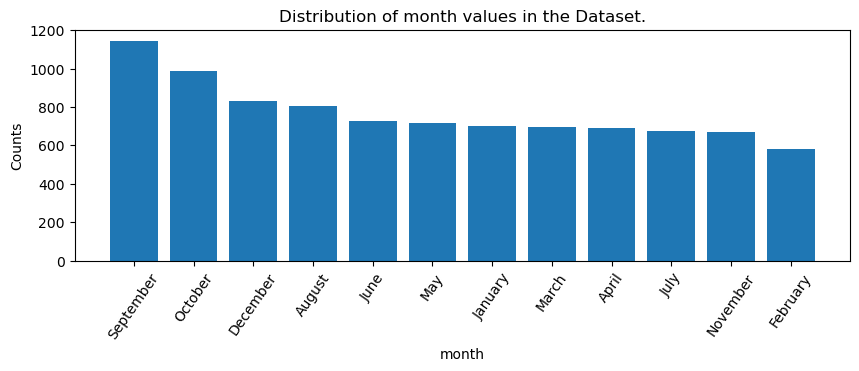

In [62]:
d1_graphs(df_ref1, 'barplot','month')

Based on the bar graph above representing the number of films produced each month, it is evident that September had the highest production count. October is closely followed as the second-highest month in film production, and the remaining months displayed relatively similar production numbers, indicating a consistent level of film production throughout the year.

Create a bar graph for column `"decade"`:

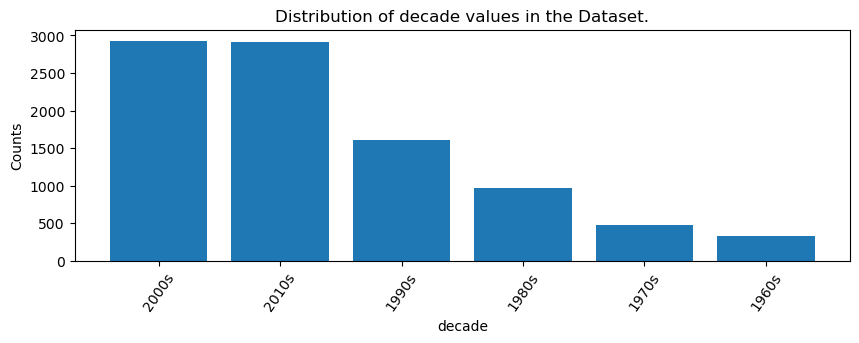

In [63]:
d1_graphs(df_ref1, 'barplot','decade')

The bar graph above, representing the number of films produced each decade, displayed a distinct trend that each new decade will likely make more films than the previous.

Print graphs for each decade with months on the x-axis and number of movies on the y-axis

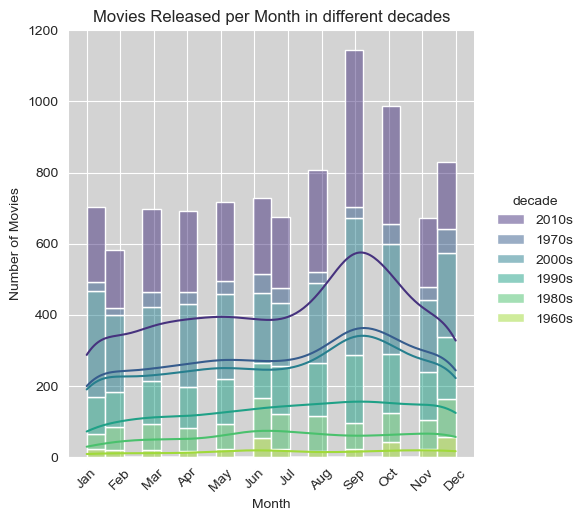

In [64]:
sns.set_style("darkgrid", {"axes.facecolor": "lightgrey"})
df_ref1['month'] = df_ref1['release_date'].dt.month
#sns.displot(data=df_ref1, x="month", hue="decade", multiple="stack",kind="hist",kde=True,palette="flare")
sns.displot(data=df_ref1, x="month", hue="decade", multiple="stack",kind="hist",kde=True,palette="viridis")
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.title(f'Movies Released per Month in different decades')
plt.xticks(rotation=45)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

### What is the most common genre for different types of movies, and what is their most common average vote?

What is the most common genre for different types of movies, and what is their most common average vote? What is the most common range of average votes for different genres?


To answer these questions, we need to:

- create a reference dataset `df_ref1`,
- Drop `'director'`,`'runtime'`, `'production_companies'`, `'release_date'`, `'company_priority'`, and `'decade'` columns
- Create a function for graph plotting
- Apply that function to all movie_types


Drop `'director'`,`'runtime'` , `'production_companies'`,`'release_date'`, `'company_priority'`, `'decade'` columns:

In [65]:
ref_1= tdf.drop(['director','runtime' , 'production_companies','release_date' ,'company_priority', 'decade'], axis=1)

Drop duplicates:

In [66]:
ref_1.drop_duplicates(inplace = True)

Double-check if we removed all duplicates:

In [67]:
ref_1.duplicated().sum()

0

Create a bar graph for column `"genres"`:

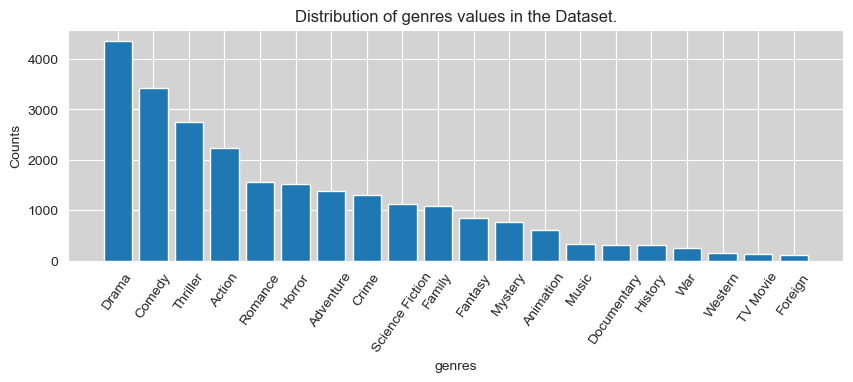

In [68]:
d1_graphs(ref_1, 'barplot',"genres")

The bar graph above is a visual representation of the counts in different genres in the dataset. Based on that graph, we can observe "Drama" as the most common genre among the movies in the dataset. This genre has the highest count, indicating that it is a popular choice among the films included in the analysis. Following closely behind is the genre "Comedy," which holds the second-highest count.

The graph allows for a quick comparison of the film quantities across different genres.

Create a histogram for column `"vote_average"`:

In [69]:
df_ref1.head()

,original_title,release_date,decade,month
0,jurassic world,2015-06-09,2010s,6
1,mad max: fury road,2015-05-13,2010s,5
2,insurgent,2015-03-18,2010s,3
3,star wars: the force awakens,2015-12-15,2010s,12
4,furious 7,2015-04-01,2010s,4


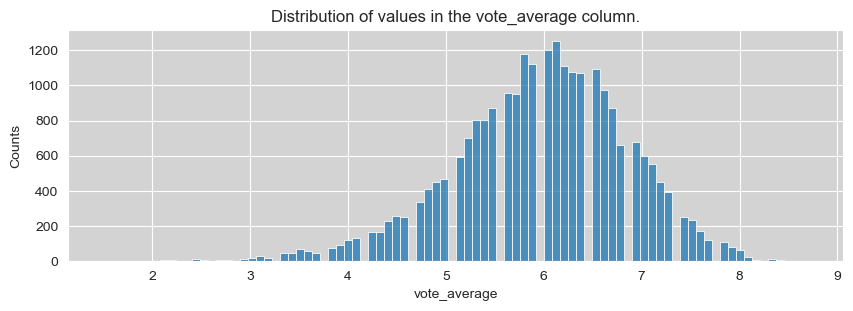

In [70]:
d1_graphs(ref_1,"hist", 'vote_average')


The histogram reveals a skewed distribution of values, leaning towards the right side. This means that most of the data are imbalanced towards higher values, while fewer values are present towards the lower end.

Create a list with unique values of `movie_type` column:

In [71]:
movie_type = ref_1['movie_type'].unique()

Create a function that will retern a heatmap for every movie_type. A heatmap should have a custom color palette for better visual appearence, on x-axis it should have genres, on y-axis it should have average vote. It will help to see the most common votes for different genres:

In [72]:
def heatmap_plotter_by_film_type(df,movie_type):
    
    df = df[df['movie_type'] == movie_type]
    
    
    # x-axis genres, y-axis vote_average
    pivot_df = df.pivot_table(index='vote_average', columns='genres', aggfunc='size', fill_value=0)

    # Reverse the order of rows
    pivot_df = pivot_df.iloc[::-1]

    # Create color palette with the smallest step for color change
    num_colors = len(pivot_df.columns)*3
    color_palette = sns.color_palette("viridis", num_colors)

    # Create the heatmap with the custom color palette
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_df, cmap=color_palette, annot=False)

    # plot title and labels
    plt.title(f'Vote Average by Genres for {movie_type} films')
    plt.xlabel('Genres')
    plt.ylabel('Vote Average')

    # Adjust lables
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0, ha='right')

    # Show the plot
    return plt.show()
    


Apply the function for each movie_type:

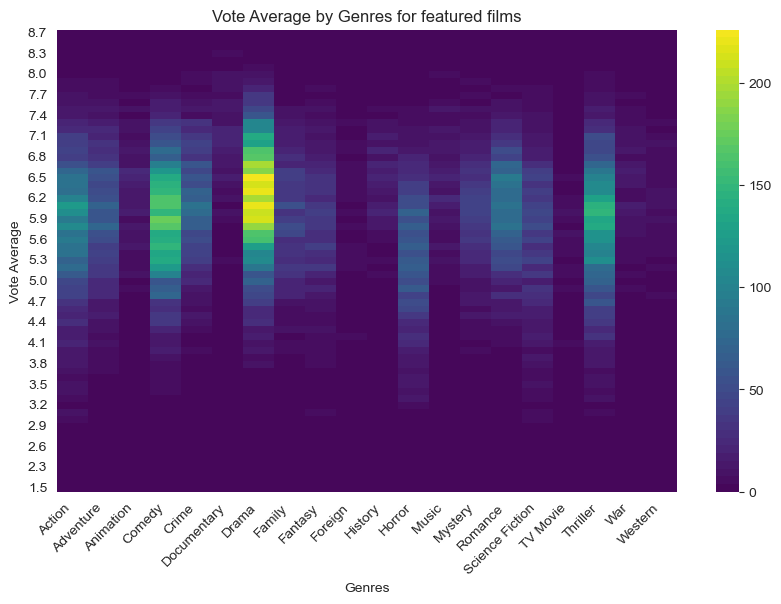

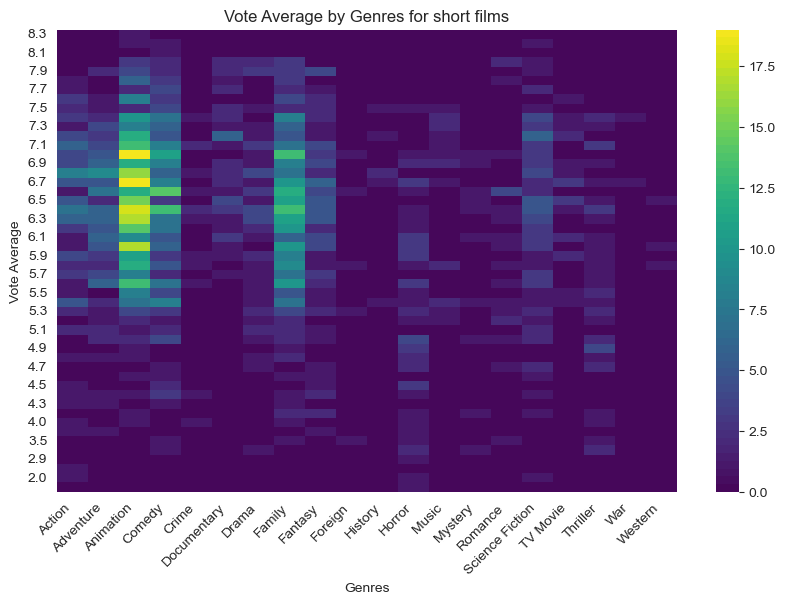

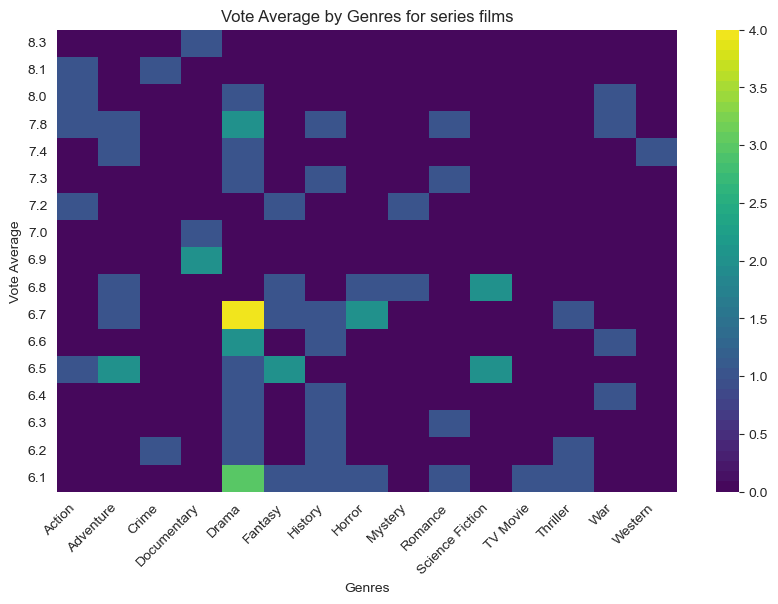

In [73]:
for movie in movie_type:
    heatmap_plotter_by_film_type(ref_1,movie)

<a id='conclusions'></a>
## Conclusions


Based on the analysis of the monthly quantity of produced films across different decades, the following conclusions can be drawn:

- Correlation: The analysis aimed to determine if there is a correlation between the monthly quantity of produced films and the respective decades. The visual exploration of the data suggests that there may be some correlation between the two variables. Further deep statistical analysis can clarify the strength and significance of this correlation.

- Distribution Patterns: The distribution patterns of the monthly quantity of produced films for all decades exhibit a skewness towards the left side. This indicates that there are generally fewer films released in certain months compared to others.

- Peak Observations: Notably, the analysis reveals that for the two latest decades, there is a more pronounced peak in the distribution. This suggests that during these decades, there are specific months when a significantly higher number of films are produced, possibly indicating industry trends or preferences during those time periods.

These findings highlight the potential correlation between the monthly quantity of produced films and the respective decades. The skewed distribution patterns and the prominent peaks in the more recent decades provide insights into the temporal variations in film production. Further investigation and statistical analysis can help validate and quantify these observations, providing a deeper understanding of the relationship between film production and time.
Based on the analysis of different types of movies and their respective genres and average votes, the following conclusions can be drawn:

- Featured Movies: The most common genre for featured movies is drama, followed by comedy. The highest common average vote for featured movies is 6.6.

- Short Movies: For short movies, the most common genre is animation, followed by family. It is worth noting that animation and family genres often go hand in hand, as many animated movies target family audiences. The highest common average vote for short movies is 7.

- Series: The most common genre for series is drama. The highest common average vote for series is 6.7.

These findings provide insights into the most common genre and average vote for different types of movies. Drama appears to be a prevalent genre across all kinds, indicating its popularity and broad appeal. Comedy is also a popular genre for featured movies. Furthermore, short movies tend to focus on animation and family genres, possibly due to their suitability for shorter formats and family-oriented content.

The highest common average votes suggest that movies across different types generally receive moderate ratings, with the range falling between 6.6 and 7. This information can help inform decisions related to genre selection and expected audience preferences when producing and promoting movies of different types.

It's important to note that these conclusions are based on the given findings and may vary depending on the specific dataset and analysis conducted. Further exploration and statistical analysis can provide more comprehensive insights into genre preferences and average voting patterns for different types of movies.


## Resources

https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet<br>
https://docs.python.org/3/library/unicodedata.html<br>
https://seaborn.pydata.org/tutorial/color_palettes.html#<br>
https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/<br>
https://www.w3schools.com/python/ref_string_isascii.asp<br>
https://www.w3schools.com/python/pandas/ref_df_applymap.asp<br>
https://www.w3schools.com/python/pandas/ref_df_explode.asp<br>
https://www.w3schools.com/python/pandas/ref_df_transform.asp<br>
https://seaborn.pydata.org/tutorial/function_overview.html<br>


